In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [157]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [158]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [159]:
df.shape

(1338, 7)

# 1. Find the Average Score for Age

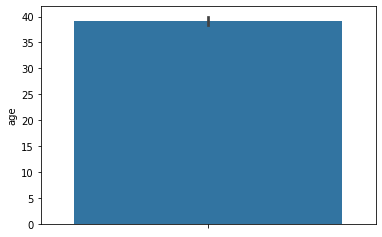

In [160]:
sns.barplot(y=df['age'], estimator = np.mean)

# 2. Find the Average Score for BMI

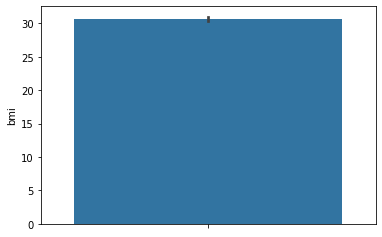

In [161]:
sns.barplot(y=df['bmi'], estimator=np.mean)

# 3. Find the Max number of children

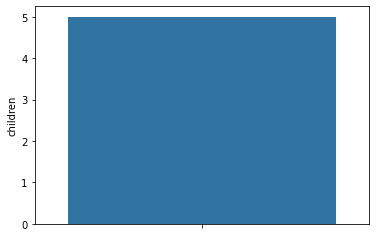

In [162]:
sns.barplot(y=df['children'], estimator=max)

# 4. Find the Average Score for charges

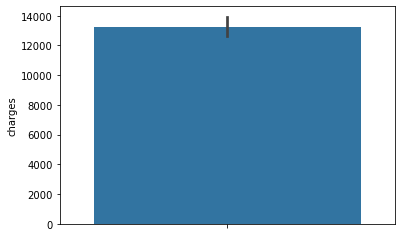

In [199]:
sns.barplot(y=df['charges'], estimator=np.mean)

# 5. Determine if outliers are present in charges

In [200]:
Outlier=px.box(df,y="charges")
Outlier

# 6. Perform an exploratory analysis to determine the percentage of children

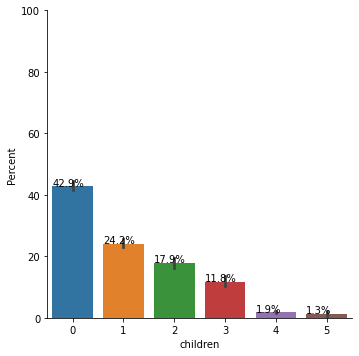

In [164]:
df_per = df.groupby('region')['children'].value_counts(normalize=True)
df_per = df_per.mul(100).rename('Percent').reset_index()

df = sns.catplot(x='children', y='Percent', kind='bar', data=df_per)
df.ax.set_ylim(0,100)

for p in df.ax.patches:
    per = str(p.get_height().round(1)) + '%'
    per_x = p.get_x()
    per_y = p.get_height()
    df.ax.text(per_x,per_y,per)

# 7. Show the distribution of charges

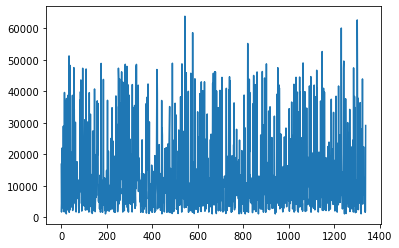

In [165]:
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('insurance.csv')
dst=plt.plot(df['charges'])

# 8. Show the distribution of BMI

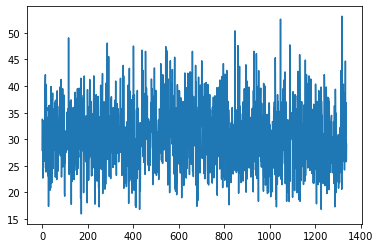

In [166]:
dst=plt.plot(df['bmi'])

9. Perform a predictive analysis to see if we can sucessfully predict the cost of medical insurance using the following algorithm:

   a. Linear Regression
   
   b. DecisionTreeRegresssor
   
   c. RandomForestRegressor
   
   Compare and contrast to pick which of the Algorithm is suitable

In [179]:
df['charges'] = df['charges'].astype('int')

In [180]:
df = df.astype({'charges':'int'})
print(df.astype)

<bound method NDFrame.astype of       age  sex     bmi  children  smoker  region  charges
0      19    0  27.900         0       1       3    16884
1      18    1  33.770         1       0       2     1725
2      28    1  33.000         3       0       2     4449
3      33    1  22.705         0       0       1    21984
4      32    1  28.880         0       0       1     3866
...   ...  ...     ...       ...     ...     ...      ...
1333   50    1  30.970         3       0       1    10600
1334   18    0  31.920         0       0       0     2205
1335   18    0  36.850         0       0       2     1629
1336   21    0  25.800         0       0       3     2007
1337   61    0  29.070         0       1       1    29141

[1338 rows x 7 columns]>


In [181]:
enc = LabelEncoder()
df['sex'] = enc.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [182]:
enc = LabelEncoder()
df['smoker'] = enc.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [183]:
enc = LabelEncoder()
df['region'] = enc.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [184]:
X = df.drop('charges', axis = 1)
Y = df['charges']

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

# Linear Regression

In [186]:
Model_A = LinearRegression()
Model_A.fit(X_train,Y_train)

LinearRegression()

In [187]:
pred = Model_A.predict(X_test)
pred

array([ 4.50002329e+03,  1.28189908e+04,  1.23972430e+04,  1.34298827e+04,
        5.31257061e+02,  3.22638349e+04,  1.30758123e+04,  1.22343270e+04,
        3.82884043e+03,  3.01559841e+04,  1.13192872e+04,  1.72080169e+04,
        8.91786552e+03,  8.22831030e+03,  3.58119299e+03,  1.01914024e+04,
        3.97083902e+03,  6.75470261e+03,  1.52136632e+04,  1.42493061e+04,
        1.24179696e+04,  3.34492832e+04,  9.12365195e+03,  8.85329647e+03,
        3.13355885e+03,  8.14370567e+03,  9.33870727e+03,  1.10787940e+04,
        7.54481493e+03,  4.40488882e+03,  1.39108007e+04,  5.64837843e+03,
        3.46822872e+04,  2.74017556e+04,  3.38100230e+04,  9.52510904e+03,
        3.06082782e+04,  2.67062069e+04,  1.54108259e+04,  3.41393440e+04,
        6.63419896e+03,  1.39732230e+04,  1.08966749e+04,  1.47976063e+04,
        4.09688404e+03,  1.29618132e+04,  4.71551287e+03,  2.92766775e+04,
        7.31736132e+03,  1.39525176e+04,  1.35185995e+04,  1.20793579e+04,
        2.00213983e+03,  

In [188]:
Model_A.score(X_test, Y_test)

0.7403660708714219

# Decision Tree Regressor

In [190]:
Model_B = DecisionTreeClassifier()
Model_B.fit(X_train,Y_train)

DecisionTreeClassifier()

In [191]:
pred = Model_B.predict(X_test)
pred

array([ 1639, 10965,  9144, 10977,  3077, 21472,  8125, 11658,  3268,
       19719, 13451, 11163,  6123,  8017,  1137,  7789,  4571,  6311,
       36910, 13041,  9361,  4753, 21677,  8457, 21344,  6858,  8302,
        8280,  5972,  3268, 12044, 19199, 10197, 17352, 40974,  8442,
       36197,  3077, 44423, 19594, 36085, 11362, 10702, 10807,  4934,
       13770,  1532, 36950,  9182, 14001, 12950, 11881,  2395,  8615,
       33732,  5836,  8522, 12638,  4391,  1146,  3353, 13143,  2639,
        2850, 13143,  8964, 23807, 12629,  2201, 15006, 25382,  6113,
        1744, 23887, 13390, 39556,  2639,  2866, 11837,  9910,  2585,
       11881, 23887,  1986,  7173, 38511,  8017, 48885, 10043,  6571,
        5267, 11729, 12928,  9249,  2117, 27346,  9872, 12643, 12231,
       20296, 10965,  2974, 19933,  1263, 26926, 34166,  2196,  6849,
        1629, 11840,  4185,  4189,  1705, 48970,  2639,  1256,  6059,
       14256,  6748,  2257,  9625, 10141,  5974,  9500, 47496,  8978,
       13430, 19719,

In [192]:
Model_B.score(X_test, Y_test)

0.024875621890547265

# Random Forest Regressor

In [194]:
Model_C =RandomForestClassifier()
Model_C.fit(X_train,Y_train)

RandomForestClassifier()

In [195]:
pred = Model_C.predict(X_test)
pred

array([ 1639, 10976,  8457, 10702,  1964, 20745,  8978, 11658,  2721,
       16577, 24513, 11411,  5584,  7337,  1137,  8027,  3866,  7151,
       14474, 13470, 10435,  5138,  7421,  8782, 21344,  6393,  6746,
        9283,  6311,  3857,  9872,  3847, 21659, 17352, 24667, 24476,
       36197, 21472, 24227, 43943,  5836, 10976, 10702, 21797,  4934,
       12323,  1725, 19350,  5458, 13430, 27346,  8823,  2045,  7151,
       15518,  5400, 30942, 12638,  4564,  1146,  3171, 13143, 19521,
        2850, 13981, 10461,  9620, 12629,  2719, 16115, 11289, 37701,
        1744, 12475, 12129, 39047,  2639,  2497, 11837,  8017,  2585,
       12643, 11305,  1972, 39047, 37484,  7623,  4753, 10043,  7209,
       21348, 21659, 11987,  7633,  1627, 27346,  7624, 11881, 12231,
        7133, 10976, 18310, 19199, 16297, 26926, 33907,  2150,  6849,
        2201, 11658,  3972,  3392,  1627, 30063,  2639,  1256,  6653,
       14256,  5428,  2257,  8269, 10407,  5478,  6250, 44260,  7196,
       13430, 17663,

In [197]:
Model_C.score(X_test, Y_test)

0.022388059701492536